# Deep Learning
    Session 13
    Basic Operation CV2 - Part 1

In [1]:
# Import some libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
# Some basic parameters
inpDir = '../../input'
outDir = '../output'
dataDir = 'basic_operations'

RANDOM_STATE = 24

np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 12),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'
         }

CMAP = 'jet'
LINE_THICK = 1
MARK_COLOR = (15, 82, 186)
plt.rcParams.update(params)

In [3]:
#Helper function
def fn_read_image(fileName):
    '''
    Args:
        fileName : Path of image file to read
    returns:
        im: image in cv2 format
        rgbIm: image in RGB format
    
    '''
    imgPath = os.path.join(inpDir, dataDir, fileName)
    
    print(imgPath)
    
    # Read image file
    im = cv2.imread(imgPath, cv2.IMREAD_COLOR)
    
    
    if im is None:
        print('Could not open or find the image:', fileName)
        exit(0)
    else:
        # convert to RGB image
        rgbIm = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
        return im, rgbIm
    
    

def fn_plot_one_img(im):
    
    '''
    Args:
        im : image to display and save
    
    '''
    # showing image
    plt.imshow(im) # Plot the Image    
    plt.axis('off') # no axis to display    
    #plt.savefig(os.path.join(outDir, imgFileName)) # save image to a dest.
        
def fn_plot_images(im_lst):
    '''
    Args:
        img_list: list of images
    '''
    nRows = 1
    nCols = len(im_lst)
    fig, axes = plt.subplots(nRows, nCols) # Instantiate thee fig and  axis
    
    for i in range(nCols):        
        # display image
        axes[i].imshow(im_lst[i]['img'], cmap = im_lst[i]['cmap'])        
        # Setting title of individual plot
        axes[i].set_title(im_lst[i]['name'])
        # Remove axis ticks from the plot
        axes[i].set_xticklabels([]);
        axes[i].set_yticklabels([]);

    # optimize the plot layout            
    plt.tight_layout()

In [4]:
#Read an Image
imgFileName = 'shapes.jpg' #'test.jpeg' # #'person_0.jpg'
srcImg, rgbImg = fn_read_image('shapes.jpg')

../../input/basic_operations/shapes.jpg
Could not open or find the image: shapes.jpg


[ WARN:0@0.050] global loadsave.cpp:244 findDecoder imread_('../../input/basic_operations/shapes.jpg'): can't open/read file: check file path/integrity


TypeError: cannot unpack non-iterable NoneType object

In [ ]:
srcImg.shape

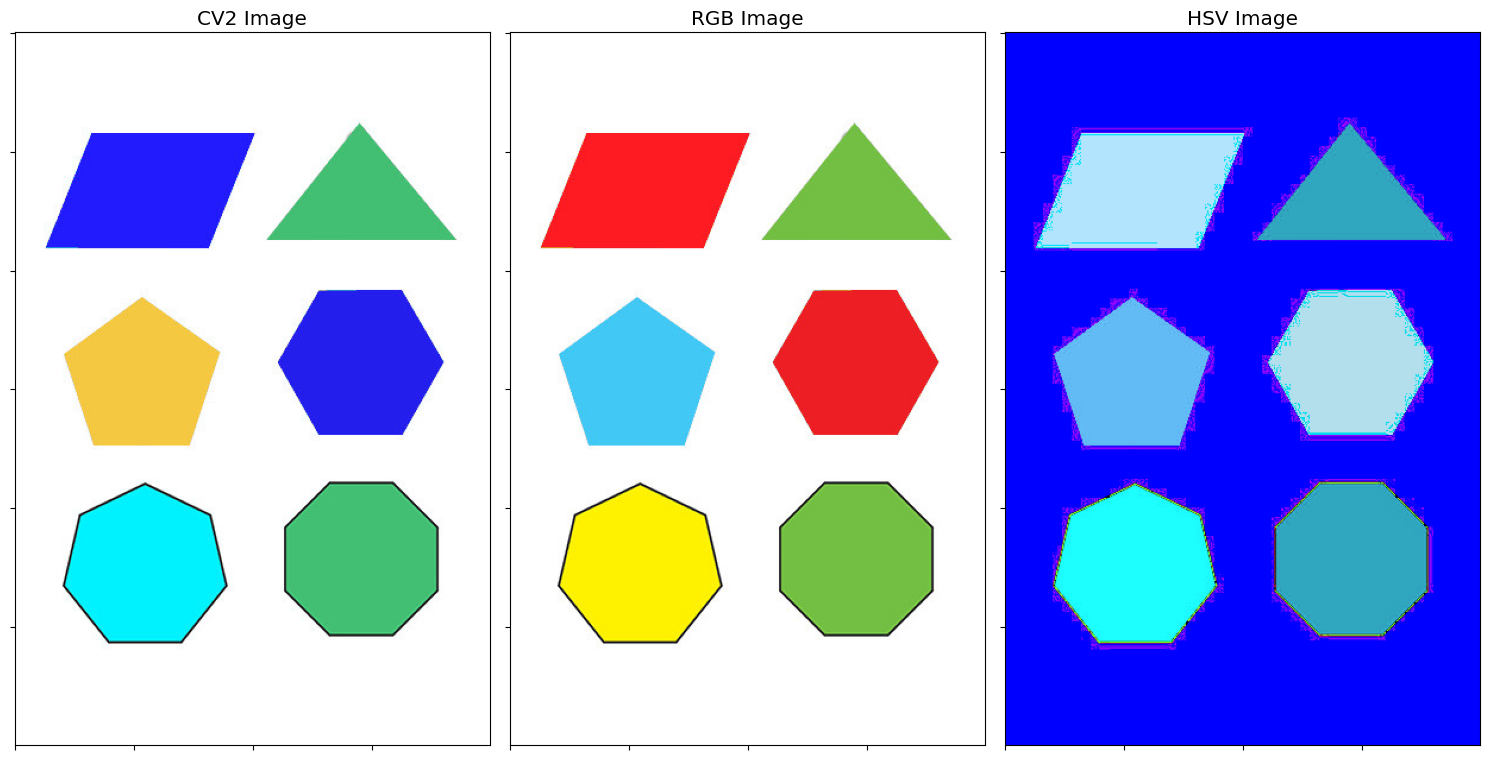

In [6]:
# Convert to HSV Image
hsvImg = cv2.cvtColor(srcImg, cv2.COLOR_BGR2HSV)

img_lst = [{'img': srcImg, 'name': 'CV2 Image', 'cmap' : CMAP},
           {'img': rgbImg, 'name': 'RGB Image', 'cmap' : CMAP},
           {'img': hsvImg, 'name': 'HSV Image','cmap' : CMAP}]

fn_plot_images(img_lst)

In [7]:
conver_method = [i for i in dir(cv2) if i.startswith('COLOR_')]
print (conver_method)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

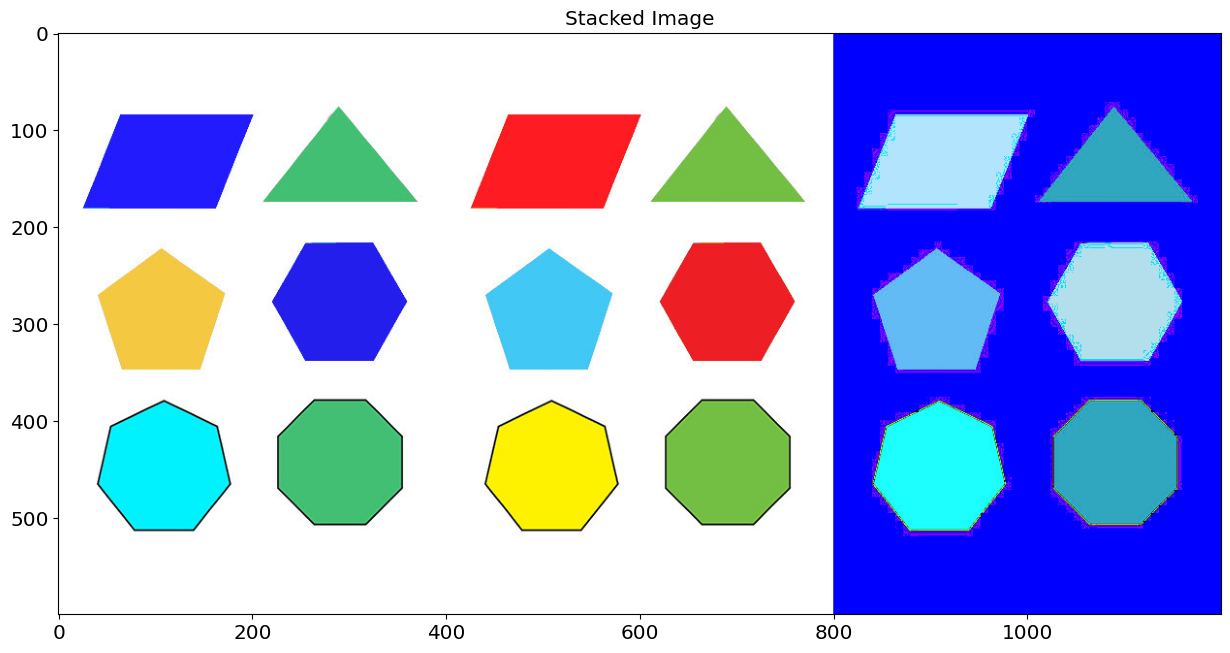

In [8]:
# Simple numpy operations is good enough to stack them
stackedImg = np.hstack((srcImg, rgbImg, hsvImg))

fig = plt.figure()
plt.imshow(stackedImg)
plt.title('Stacked Image');

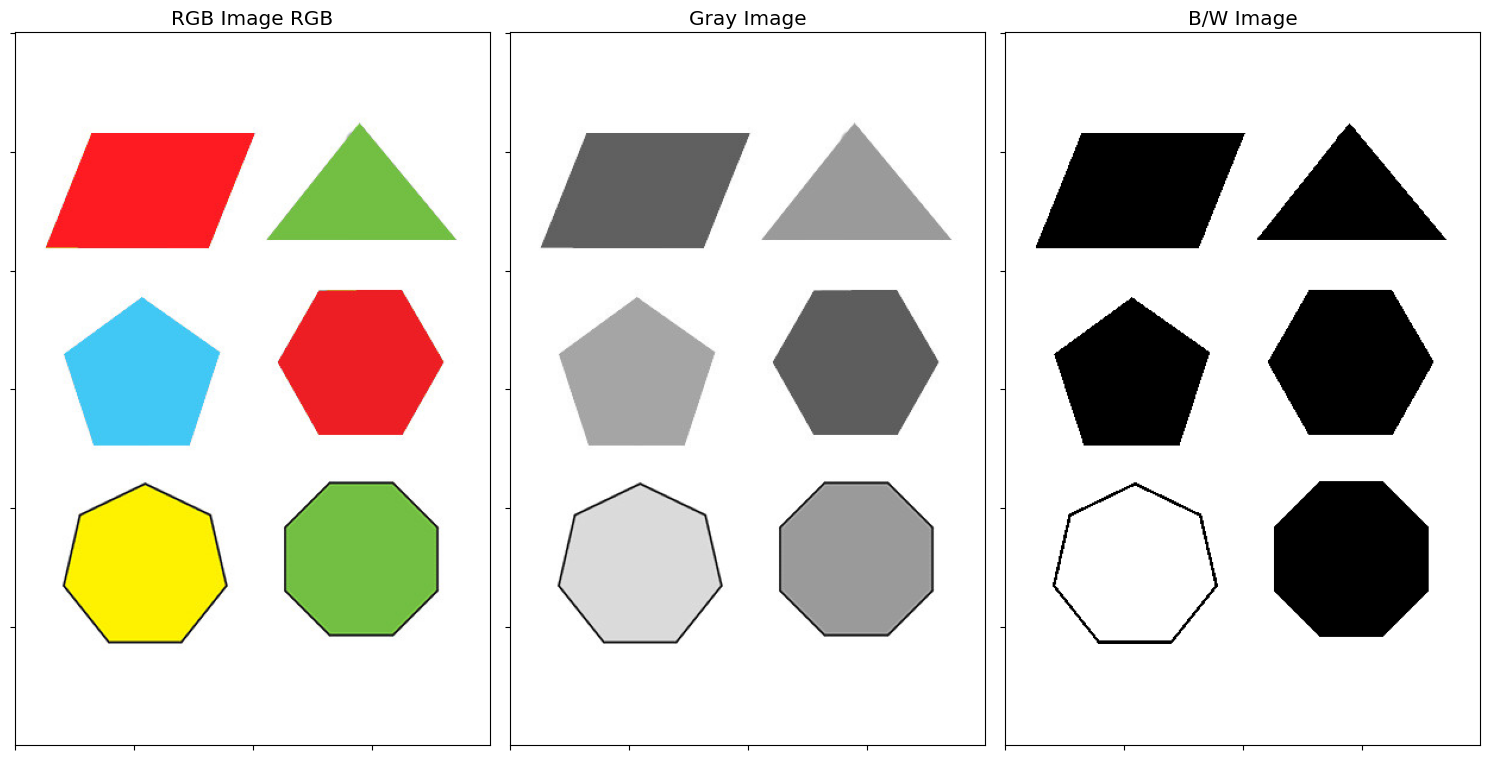

In [9]:
grayImg =  cv2.cvtColor(srcImg, cv2.COLOR_BGR2GRAY)

(thresh, bwImg) = cv2.threshold(grayImg, 128, 255, 
                                cv2.THRESH_BINARY | cv2.THRESH_OTSU)

img_lst = [{'img': rgbImg, 'name': 'RGB Image RGB', 'cmap' : CMAP},
           {'img': grayImg, 'name': 'Gray Image','cmap' : 'gray'},
           {'img': bwImg, 'name': 'B/W Image', 'cmap' :'gray'}]

fn_plot_images(img_lst)

In [10]:
redImg = rgbImg .copy()
redImg[:,:, 1] = 0
redImg[:,:, 2] = 0
print ('Shape of Red Image', redImg.shape)


greenImg = rgbImg .copy()
greenImg[:,:, 0] = 0
greenImg[:,:, 2] = 0
print ('Shape of Green Image', greenImg.shape)



blueImg = rgbImg .copy()
blueImg[:,:, 0] = 0
blueImg[:,:, 1] = 0
print ('Shape of Blue Image', blueImg.shape)

Shape of Red Image (600, 400, 3)
Shape of Green Image (600, 400, 3)
Shape of Blue Image (600, 400, 3)


Shape of Red Channel (600, 400)
Shape of Green Channel (600, 400)
Shape of Blue Channel (600, 400)


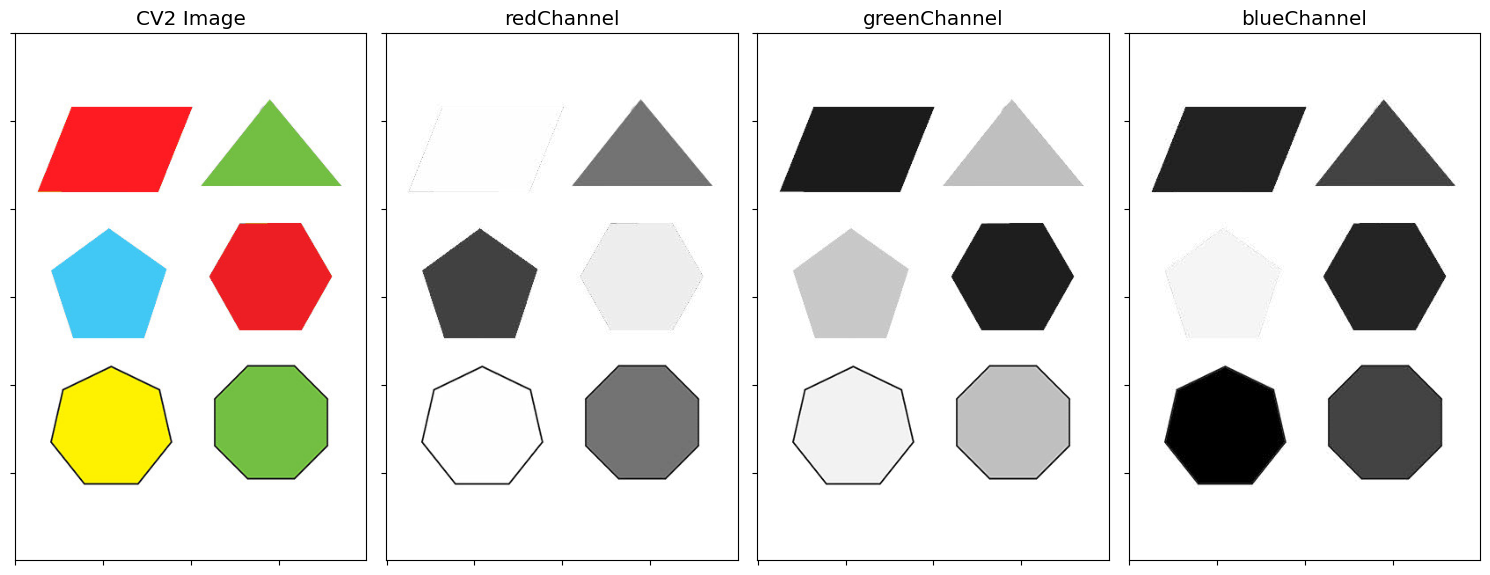

In [11]:
redChannel = rgbImg .copy()
redChannel = redChannel[:,:, 0]
print ('Shape of Red Channel', redChannel.shape)

greenChannel = rgbImg .copy()
greenChannel = greenChannel[:,:, 1]
print ('Shape of Green Channel', greenChannel.shape)

blueChannel = rgbImg .copy()
blueChannel = blueChannel[:,:, 2]
print ('Shape of Blue Channel', blueChannel.shape)

img_lst = [{'img': rgbImg, 'name': 'CV2 Image', 'cmap' : CMAP},
           {'img': redChannel, 'name': 'redChannel', 'cmap' : 'gray'},
           {'img': greenChannel, 'name': 'greenChannel','cmap' : 'gray'},
           {'img': blueChannel, 'name': 'blueChannel', 'cmap' :'gray'}]

fn_plot_images(img_lst)

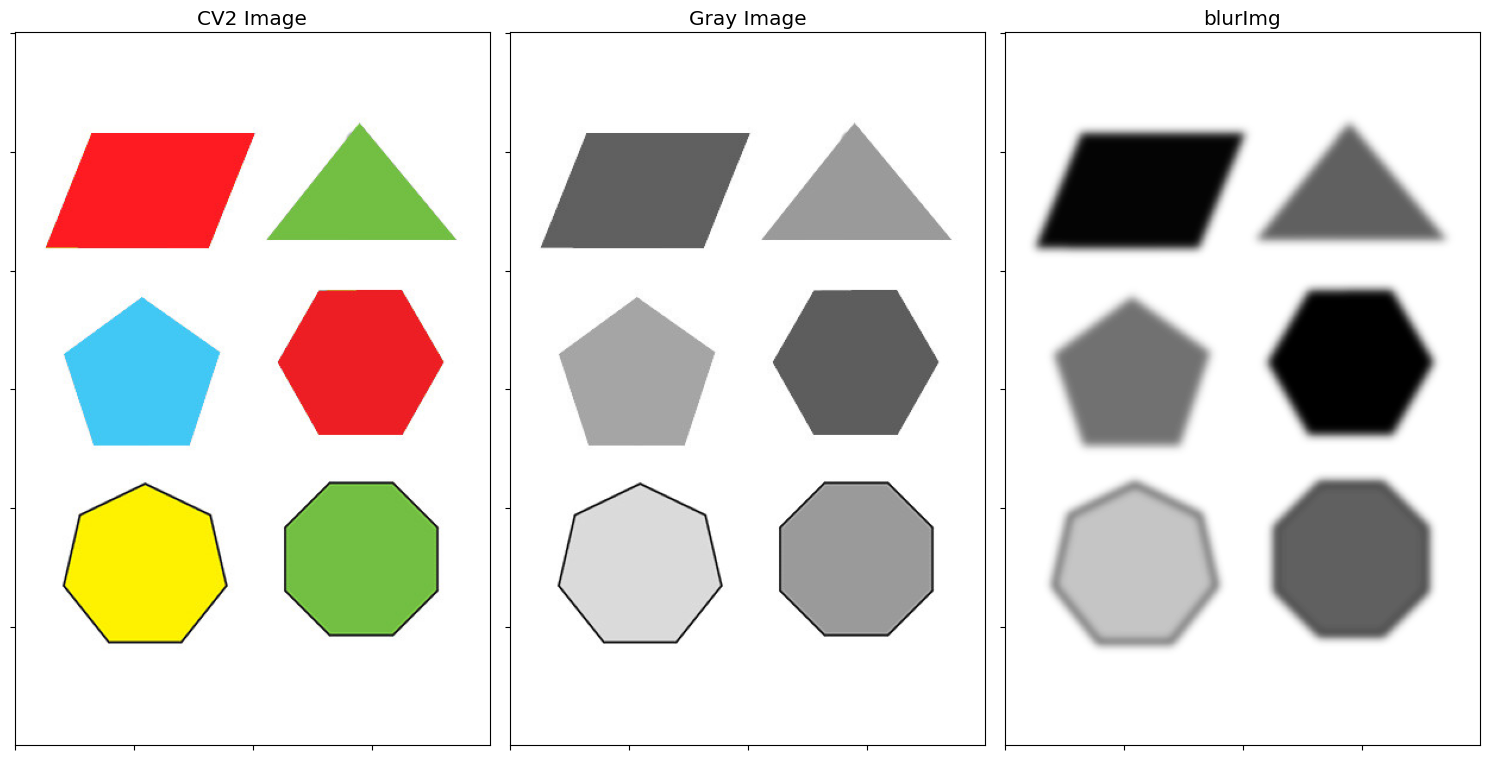

In [12]:
blurImg = cv2.GaussianBlur(grayImg, (21,21), 0)

img_lst = [{'img': rgbImg, 'name': 'CV2 Image', 'cmap' : CMAP},
           {'img': grayImg, 'name': 'Gray Image','cmap' : 'gray'},
           {'img': blurImg, 'name': 'blurImg','cmap' : 'gray'}]

fn_plot_images(img_lst)

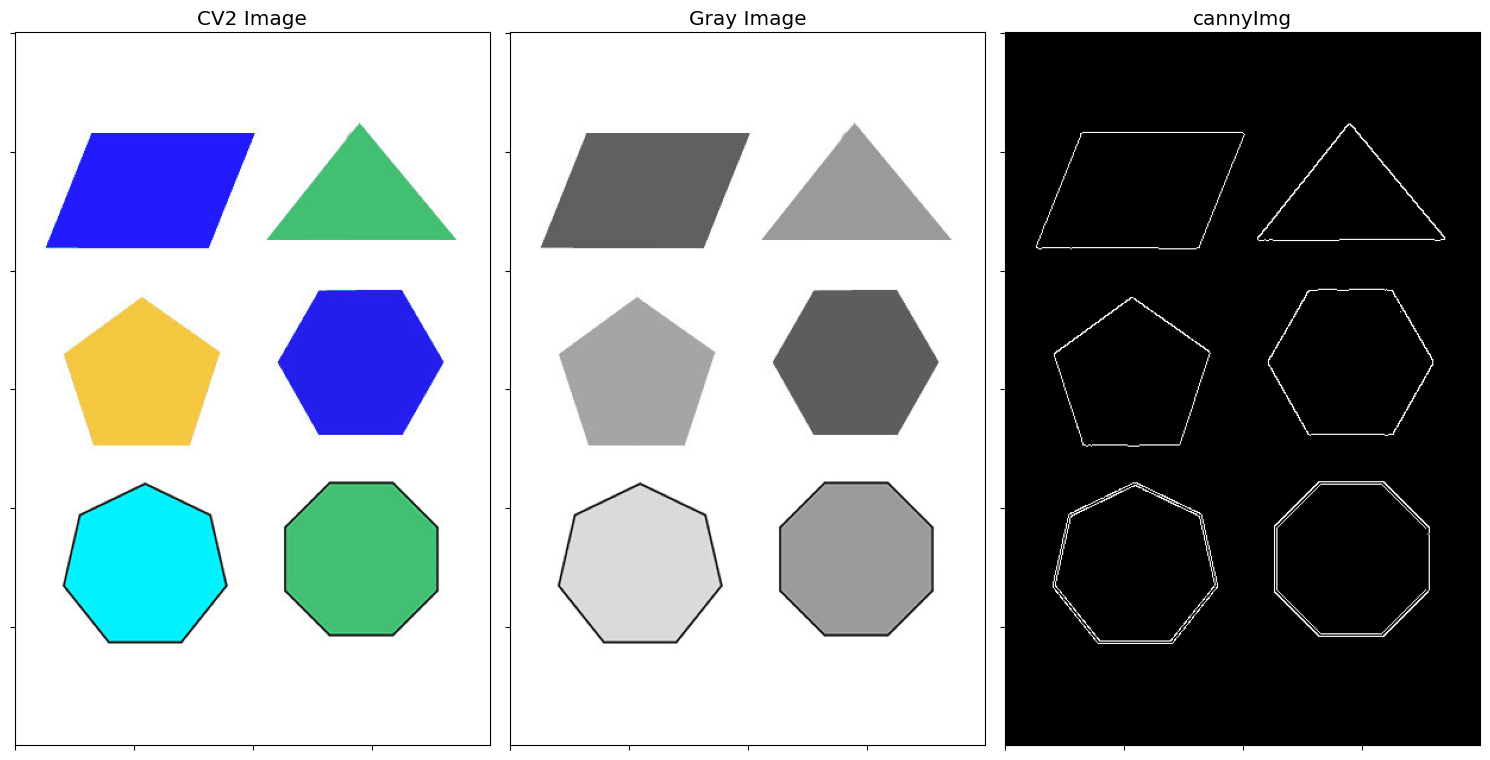

In [13]:
cannyImg = cv2.Canny(srcImg, 150, 150)

img_lst = [{'img': srcImg, 'name': 'CV2 Image', 'cmap' : CMAP},
           {'img': grayImg, 'name': 'Gray Image','cmap' : 'gray'},
           {'img': cannyImg, 'name': 'cannyImg','cmap' : 'gray'}]

fn_plot_images(img_lst)

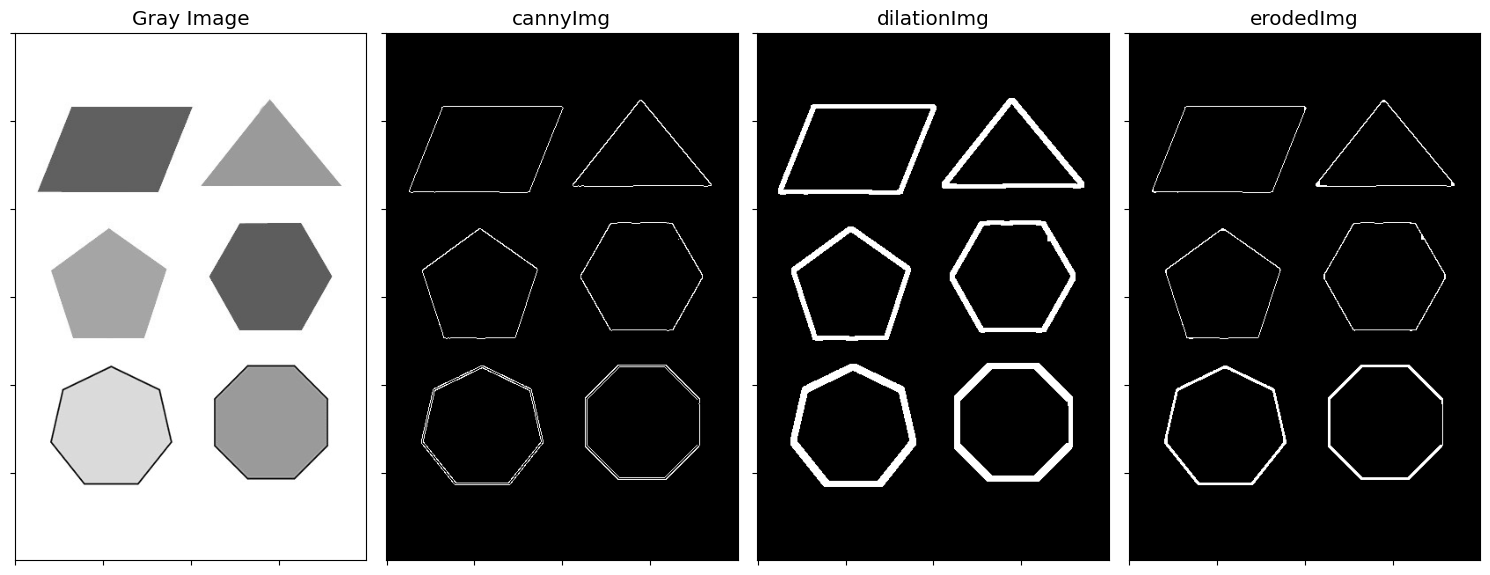

In [14]:
krnl = np.ones((5,5)) / 25.

# bright area of the image dilates around the black regions of the background.
dilationImg = cv2.dilate(cannyImg, krnl, iterations = 1) # Change iteration to increase dialation

# inverse of dialation
erodedImg = cv2.erode(dilationImg, krnl, iterations = 1)

img_lst = [{'img': grayImg, 'name': 'Gray Image','cmap' : 'gray'},
           {'img': cannyImg, 'name': 'cannyImg','cmap' : 'gray'},
           {'img': dilationImg, 'name': 'dilationImg','cmap' : 'gray'},
          {'img': erodedImg, 'name': 'erodedImg','cmap' : 'gray'},
           ]

fn_plot_images(img_lst)

In [ ]:
width = rgbImg.shape[1]
height = rgbImg.shape[0]
print (width, height)

In [ ]:
resizeImg = cv2.resize(rgbImg, (width//2,height//2 ))
cropImg = rgbImg[0:height//3, width//4:3*width//4]

img_lst = [{'img': rgbImg, 'name': 'RGB Image','cmap' : CMAP},
           {'img': resizeImg, 'name': f'resizeImg ({width//2} x {height//2})','cmap' : CMAP},
           {'img': cropImg, 'name': 'cropImg','cmap' : CMAP}]

fn_plot_images(img_lst)

In [ ]:
blnkImg = np.zeros((512, 960,3), np.int8)

cv2.line(blnkImg, (0,0), (blnkImg.shape[1], blnkImg.shape[0]),
         (0,255,0), 2)

cv2.rectangle(blnkImg, (0,0), (250,350), MARK_COLOR, 5)

cv2.circle(blnkImg, (400,50), 30, (255,255,0), 2)

cv2.putText(blnkImg, 'CDAC', (300,200), 
            cv2.FONT_HERSHEY_COMPLEX,1, (0,150,0), 3)

plt.imshow(blnkImg);

In [ ]:
height, width = srcImg.shape[:2] 
quarter_height, quarter_width = height/4, width/4

T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]]) 
transImg = cv2.warpAffine(rgbImg, T, (width, height)) 

img_lst = [{'img': rgbImg, 'name': 'RGB Image','cmap' : CMAP},
           {'img': transImg, 'name': 'transImg','cmap' : CMAP}]

fn_plot_images(img_lst)

In [ ]:
srcImg.shape[0]

In [ ]:
# create Source triangle with 'top-right', 'top-left', 'bottom-left'
srcTri = np.array( [[0, 0], [srcImg.shape[1] - 1, 0], 
                    [0, srcImg.shape[0] - 1]] ).astype(np.float32)

# Create destinations triangle
tl = [0, int(srcImg.shape[1]*0.33)]
tr = [int(srcImg.shape[1]*0.85), int(srcImg.shape[0]*0.15)]
bl = [int(srcImg.shape[1]*0.15), int(srcImg.shape[0]*0.7)]

# convert to array
dstTri = np.array( [tl, tr, bl ] ).astype(np.float32)

# mark points on the image for display
markedupImg = rgbImg.copy()

cv2.circle(markedupImg, (tl), 5, MARK_COLOR, LINE_THICK)
cv2.putText(markedupImg, 'Top Left', (tl), cv2.FONT_HERSHEY_COMPLEX,1,
            (0,255,0), 1)

cv2.circle(markedupImg, (tr), 5, MARK_COLOR, LINE_THICK)
cv2.putText(markedupImg, 'Top Right', (tr), cv2.FONT_HERSHEY_COMPLEX,1,
            (0,255,0), 1)

cv2.circle(markedupImg, (bl), 5, MARK_COLOR, LINE_THICK)
cv2.putText(markedupImg, 'Bottom left', (bl), cv2.FONT_HERSHEY_COMPLEX,1,
            (0,255,0), 1)

# mark the triangle
isClosed = True
 
# Blue color in RGB
#color = (0, 0, 255)

poly = np.array([tl,tr,bl], np.int32)

poly = poly.reshape((-1, 1, 2))

cv2.polylines(markedupImg, [poly],
                      isClosed, MARK_COLOR, LINE_THICK)

# get warp matrix for transformation
warp_mat = cv2.getAffineTransform(srcTri, dstTri)

# warp the image
warpImg = cv2.warpAffine(rgbImg, warp_mat, 
                         (srcImg.shape[1], srcImg.shape[0]))

# mark the points
tmpImg = warpImg.copy()
cv2.circle(tmpImg, (tl), 5, (255,0,0), LINE_THICK)
cv2.circle(tmpImg, (tr), 5, (255,0,0), LINE_THICK)
cv2.circle(tmpImg, (bl), 5, (255,0,0), LINE_THICK)
cv2.polylines(tmpImg, [poly],
                      isClosed, MARK_COLOR, 5)

img_lst = [{'img': rgbImg, 'name': 'RGB Image','cmap' : CMAP},
           {'img': markedupImg, 'name': 'markedupImg','cmap' : CMAP},
           {'img': tmpImg, 'name': 'warpImg','cmap' : CMAP}]


fn_plot_images(img_lst)

In [ ]:
fn_plot_one_img(tmpImg)

In [ ]:
center = (warpImg.shape[1]//2, warpImg.shape[0]//2)
angle = -30
scale = 0.8

# We need to create a matrix to rotate
rot_mat = cv2.getRotationMatrix2D( center, angle, scale )

rotatedImg = cv2.warpAffine(rgbImg, rot_mat, (srcImg.shape[1], 
                                              srcImg.shape[0]))

wNrImg = cv2.warpAffine(warpImg, rot_mat, (srcImg.shape[1], 
                                           srcImg.shape[0]))

img_lst = [{'img': rgbImg, 'name': 'RGB Image','cmap' : CMAP},
           {'img': warpImg, 'name': 'warpImg','cmap' : CMAP},
           {'img': rotatedImg, 'name': 'rotatedImg','cmap' : CMAP},
           {'img': wNrImg, 'name': 'Warped and Rotated','cmap' : CMAP}]

fn_plot_images(img_lst)

In [ ]:
br = [400, 379]

# Polygon corner points coordinates in  a consistent order of the points
poly = np.array([tl, bl, br, tr], np.int32)

# To draw a polygon, first you need coordinates of vertices. Make those points
# into an array of shape ROWSx1x2 where ROWS are number of vertices 
# and it should be of type int32.
poly1 = poly.reshape((-1, 1, 2))

# is it a closed polygon
isClosed = True
 
# Blue color in BGR
color = (0, 0, 255)
 
# Line thickness of 3 px
thickness = 3

# make a copy of wraped Image
tmpImg = warpImg.copy()

# Mark draw a the polygon
cv2.polylines(tmpImg, [poly1],
                      isClosed, color, thickness)

# Mark points on the image
cv2.circle(tmpImg, (tl), 3, MARK_COLOR, LINE_THICK)
cv2.putText(tmpImg, 'Top Left', (tl), cv2.FONT_HERSHEY_COMPLEX,1, (0,255,0), 1)

cv2.circle(tmpImg, (tr), 3, MARK_COLOR, LINE_THICK)
cv2.putText(tmpImg, 'Top Right', (tr), cv2.FONT_HERSHEY_COMPLEX,1, (0,255,0), 1)

cv2.circle(tmpImg, (bl), 3, MARK_COLOR, LINE_THICK)
cv2.putText(tmpImg, 'Bottom left', (bl), cv2.FONT_HERSHEY_COMPLEX,1, (0,255,0), 1)

cv2.circle(tmpImg, (br), 3, MARK_COLOR, LINE_THICK)
cv2.putText(tmpImg, 'Bottom Right', (br), cv2.FONT_HERSHEY_COMPLEX,1, (0,255,0), 1)

# now that we have the dimensions of the new image, construct
# the set of destination points to obtain a (i.e. top-down view)
# of the image, again specifying points
# in the top-left, top-right, bottom-right, and bottom-left
# order

src = np.array([tl, tr, br, bl], dtype = 'float32')
dst = np.array([[0, 0],
                [width, 0],
                [width, height],
                [0, height]], dtype = "float32")

# Create Transformation matrix
matrix = cv2.getPerspectiveTransform(src,dst)

# Transform the image
strImg = cv2.warpPerspective(warpImg, matrix, (width, height))

# Check the difference
diffImg = rgbImg - strImg

img_lst = [{'img': rgbImg, 'name': 'RGB Image','cmap' : CMAP},
           {'img': tmpImg, 'name': 'wraped Image','cmap' : CMAP},
           {'img': strImg, 'name': 'Straightened Image','cmap' : CMAP},
           {'img': diffImg, 'name': 'difference','cmap' : CMAP},]

fn_plot_images(img_lst)

In [1]:
def getContours(im):
    
    '''
    Args:
        im: CV2 image object (Canny Image)
    '''
    
    contours, hierarchy = cv2.findContours(im, 
                                           cv2.RETR_EXTERNAL, 
                                           cv2.CHAIN_APPROX_NONE) # good for finding outer countours
    
    for cnt in contours:        
        area = cv2.contourArea(cnt)   
        
        if area  > 50:            
            cv2.drawContours(contoursImg, cnt, -1, (255,0,0), 1) # plot where area is significant            
            peri = cv2.arcLength(cnt, True)
            
            #print (area, peri)
            
            # get approx corner point
            approx = cv2.approxPolyDP(cnt, 0.01*peri, True)             
            #print (area, '|', len(approx))            
            objCor = len(approx)
            
            # get bounding box of the approx
            x, y, w, h = cv2.boundingRect(approx)            
            cv2.rectangle(contoursImg, (x,y), (x+w, y+h), MARK_COLOR)
                
            cv2.putText(contoursImg, str(objCor), 
                            (x+w//2-10, y+h//2+10), # Origin
                            cv2.FONT_HERSHEY_COMPLEX, #fontFace
                            1,             #fontScale                            
                            MARK_COLOR, #color
                            1) # thickness
        
# Create copy of RGB Image     
contoursImg = rgbImg.copy()
    
getContours(cannyImg)

img_lst = [#{'img': rgbImg, 'name': 'RGB Image','cmap' : CMAP},
           {'img': cannyImg, 'name': 'Canny Image','cmap' : 'gray'},
           {'img': contoursImg, 'name': 'Contours','cmap' : CMAP}]

fn_plot_images(img_lst)

NameError: name 'rgbImg' is not defined

In [ ]:
imgFileName = 'bubblingFish.jpg'

srcImg, rgbImg = fn_read_image(imgFileName)

print (srcImg.shape)

In [ ]:
grayImg = cv2.cvtColor(srcImg, cv2.COLOR_BGR2GRAY) 

cannyImg = cv2.Canny(grayImg, 30, 200) 

rgbImg = cv2.cvtColor(srcImg, cv2.COLOR_BGR2RGB)

img_lst = [{'img': srcImg, 'name': 'Source Image','cmap' : CMAP},
           {'img': rgbImg, 'name': 'RBG Image','cmap' : CMAP},
           {'img': cannyImg, 'name': 'Canny Image','cmap' : 'gray'}]

fn_plot_images(img_lst)

In [ ]:
contours, hierarchy = cv2.findContours(cannyImg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


print("Number of Contours: " + str(len(contours)))


In [ ]:
tmpImg = rgbImg.copy()

tmp2Img = np.ones_like(rgbImg)*255

cv2.drawContours(tmpImg, contours, -1, (0, 255, 0), 1)

if len(contours) != 0:
    c = max(contours, key = cv2.contourArea)

# Draw biggest contour in Blue
cv2.drawContours(tmp2Img, c, -1, (0, 0, 255),1)

img_lst = [{'img': rgbImg, 'name': 'RBG Image','cmap' : CMAP},
           {'img': tmpImg, 'name': 'Countours','cmap' : CMAP},
           {'img': tmp2Img, 'name': 'Largest','cmap' : CMAP}]

fn_plot_images(img_lst)

In [ ]:
srcImg.shape

In [ ]:
imgFileName = 'Lionel_Messi_1.jpg'

srcImg, rgbImg = fn_read_image(imgFileName)

mkdImg = rgbImg.copy()

cv2.rectangle(mkdImg, (190, 4), (845,665), MARK_COLOR, 5)

img_lst = [{'img': srcImg, 'name': 'Source','cmap' : CMAP},
           {'img': rgbImg, 'name': 'RGB Image','cmap' : CMAP},
           {'img': mkdImg, 'name': 'Marked Image','cmap' : CMAP},
          ]
fn_plot_images(img_lst)

In [ ]:
fn_plot_one_img(mkdImg)

In [ ]:
mask = np.zeros(rgbImg.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (190, 4, 845,665)

cv2.grabCut(rgbImg,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
cutImg = rgbImg*mask2[:,:,np.newaxis]

img_lst = [{'img': rgbImg, 'name': 'RGB','cmap' : CMAP},
           {'img': cutImg, 'name': 'Cut Image','cmap' : CMAP}]
fn_plot_images(img_lst)

In [ ]:
newmask = cv2.imread(os.path.join(inpDir, dataDir, 'Lionel_Messi_mask.jpg'),0)

mask[newmask == 0] = 0
mask[newmask == 255] = 1

mask, bgdModel, fgdModel = cv2.grabCut(rgbImg, mask, None, bgdModel,
                                       fgdModel,5,cv2.GC_INIT_WITH_MASK)

mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')

cutImg = rgbImg*mask[:,:,np.newaxis]

img_lst = [{'img': rgbImg, 'name': 'RGB','cmap' : CMAP},
           {'img': cutImg, 'name': 'Cut Image','cmap' : CMAP}]

fn_plot_images(img_lst)

In [ ]:
fn_plot_one_img(cutImg)